Descente de gradient
====================

Equation : $ Y = X.\theta + N$  
Où N est un vecteur bruit  
et theta un vecteur comportant les valeurs de a et b tel que y = a.x + b  


In [1]:
import numpy as np
import math
import random

import matplotlib
import matplotlib.pyplot as plt

import deepmods.notebook as ooo

ooo.init(id='02', save_figs=True)


Deepmod by pjluc 2019
  Version          : 0.4
  Run time         : Monday 16 September 2019, 10:43:19
  Run directory    : ./run/lab-02
  Save figs        : True
  Matplotlib style : deepmods/talk.mplstyle
  Hide warning     : True

TensorFlow version :  1.14.0
Keras version      :  2.2.4-tf

Init done.


Normalisation ou standardisation
--------------------------------
On parle aussi de **centrer-réduire**.  
Cela se fait par soustraction de la **moyenne** et division par **l'écart type**.  
On obtient ainsi une dispersion nulle et un écart-type de 1.  

La formule est : $X_{std}^{j}=\frac{X_{j}-\overline{X}_j}{\sigma_j}$  

Avec : $\sigma_j=\sqrt{\frac{1}{n}\sum_{i=1}^n\left(X_{ij}-\overline{X}_j\right)^2}
=\sqrt{\frac{1}{n}\left(\sum_{i=1}^n X_{ij}^2\right)-\overline{X}_j^2}$

Exemple :

In [2]:

X = np.random.uniform(-5,10,(3,1))
m = X.mean(axis=0)
s = X.std(axis=0)
print("\nX :\n",X,"\nMoyenne = {}  Ecart-type = {}".format(m,s))

X_norm = (X - X.mean(axis=0)) / X.std(axis=0)
m = X_norm.mean(axis=0)
s = X_norm.std(axis=0)
print("\nX_norm :\n",X_norm,"\nMoyenne = {}  Ecart-type = {}".format(m,s))




X :
 [[8.58269061]
 [2.92819304]
 [0.14157704]] 
Moyenne = [3.88415356]  Ecart-type = [3.51174173]

X_norm :
 [[ 1.33795063]
 [-0.27221835]
 [-1.06573228]] 
Moyenne = [-1.48029737e-16]  Ecart-type = [1.]


Descente de gradient
--------------------
Le gradient de la fonction de coût $MSE(\theta)$ est :  

$\frac{\partial MSE}{\partial a}=\frac2n\sum_{i=1}^n\left[
a \cdot x_i + b - y_i
\right] \cdot x_i
$

et 

$
\frac{\partial MSE}{\partial b}=\frac2n\sum_{i=1}^n\left[
a \cdot x_i + b - y_i
\right]
$

La modification de a et b se fait ensuite par pas progressif, avec $\eta$ appelé **taux d'apprentissage** :  

$a \leftarrow a - \eta \cdot \frac{\partial MSE}{\partial a}$

$b \leftarrow b - \eta \cdot \frac{\partial MSE}{\partial b}$

Formulation **vectorielle**, avec **n dimensions** :

$
\triangledown_\theta MSE(\Theta)=\begin{bmatrix}
\frac{\partial}{\partial \theta_0}MSE(\Theta)\\
\frac{\partial}{\partial \theta_1}MSE(\Theta)\\
\vdots\\
\frac{\partial}{\partial \theta_n}MSE(\Theta)
\end{bmatrix}=\frac2m X^T\cdot(X\cdot\Theta-Y)
$  

et :  

$\Theta \leftarrow \Theta - \eta \cdot \triangledown_\theta MSE(\Theta)$

Notes : 
- https://matthewebmckenna.com/posts/2017/05/gradient-descent-linear-regression  
- https://eli.thegreenplace.net/2016/linear-regression/  

Exemples : 
- https://github.com/eliben/deep-learning-samples/blob/master/linear-regression/multiple_linear_regression.py


Préparation des données d'apprentissage :
-----------------------------------------

Nombre de points : 1000000  a=16 b=9 bruit=43

Données d'aprentissage brute :
(1000 points visibles sur 1000000)


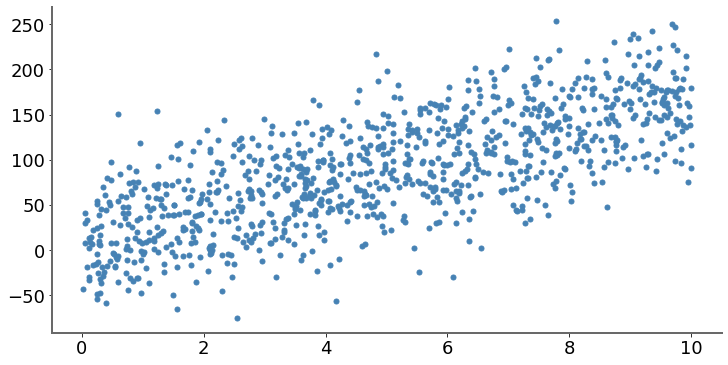

X        :      mean=     +4.9985  std=     +2.8853    min=     +0.0000    max=    +10.0000
Y        :      mean=    +88.9505  std=    +63.1317    min=   -155.1185    max=   +355.9691

Données d'aprentissage normalisées :
(1000 points visibles sur 1000000)


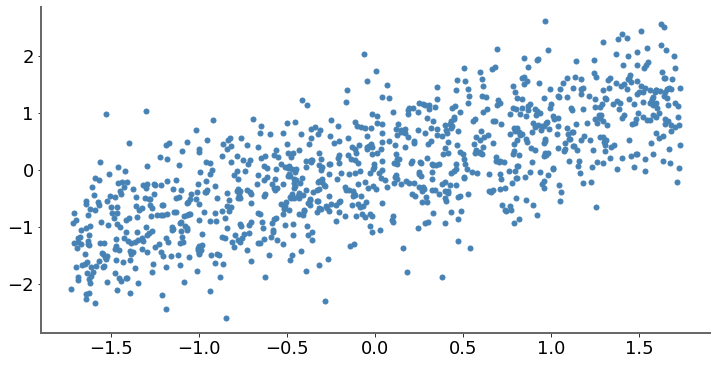

X_norm   :      mean=     -0.0000  std=     +1.0000    min=     -1.7324    max=     +1.7334
Y_norm   :      mean=     -0.0000  std=     +1.0000    min=     -3.8660    max=     +4.2295


In [3]:
# ---- Paramètres du jeu d'apprentissage ----------------

n         = 1000000     # Nombre d'observations avec y = a.x + b

xob_min   = 0      # x min and max
xob_max   = 10

a_min     = -30     # a min and max
a_max     =  30
b_min     = -10     # b min and max
b_max     =  10

noise_min =  10     # noise min and max
noise_max =  50

a0    = random.randint(a_min,a_max)       
b0    = random.randint(b_min,b_max)       
noise = random.randint(noise_min,noise_max)

# ---- Construction du jeu d'apprentissage ---------------
#      X,Y              : données brutes
#      X_norm,Y_norm    : données normaliseés

X = np.random.uniform(xob_min,xob_max,(n,1))
# N = np.random.uniform(-noise,noise,(n,1))
N = noise * np.random.normal(0,1,(n,1))

Y = a0*X + b0 + N

x_min= X.min()
x_max= X.max()
y_min= Y.min()
y_max= Y.max()

# ---- Normalisation des données --------------------------
#
def vector_infos(name,V):
    m=V.mean(axis=0).item()
    s=V.std(axis=0).item()
    print("{:8} :      mean={:+12.4f}  std={:+12.4f}    min={:+12.4f}    max={:+12.4f}".format(name,m,s,V.min(),V.max()))

X_norm = (X - X.mean(axis=0)) / X.std(axis=0)
x_norm_min= X_norm.min()
x_norm_max= X_norm.max()

Y_norm = (Y - Y.mean(axis=0)) / Y.std(axis=0)
y_norm_min= Y_norm.min()
y_norm_max= Y_norm.max()

# ---- Visualisation des données --------------------------

width = 12
height = 6
nb_viz = min(1000,n)

print("Nombre de points : {}  a={} b={} bruit={}".format(n,a0,b0,noise))

print("\nDonnées d'aprentissage brute :")
print("({} points visibles sur {})".format(nb_viz,n))
plt.figure(figsize=(width, height))
plt.plot(X[:nb_viz], Y[:nb_viz], '.')
ooo.save_fig('LinearReg-a',svg=False)
plt.show()
vector_infos('X',X)
vector_infos('Y',Y)

print("\nDonnées d'aprentissage normalisées :")
print("({} points visibles sur {})".format(nb_viz,n))
plt.figure(figsize=(width, height))
plt.plot(X_norm[:nb_viz], Y_norm[:nb_viz], '.')
ooo.save_fig('LinearReg-b',svg=False)
plt.show()
vector_infos('X_norm',X_norm)
vector_infos('Y_norm',Y_norm)


Descente de gradient **ordinaire** (1) :
--------------------------------

theta:  a=     +0.0000 b=     -3.8660
theta:  a=     +4.5309 b=     -2.5480
theta:  a=     +4.3885 b=     -1.6794
theta:  a=     +3.4523 b=     -1.1068
theta:  a=     +2.6084 b=     -0.7295
theta:  a=     +1.9912 b=     -0.4808
theta:  a=     +1.5680 b=     -0.3169
theta:  a=     +1.2846 b=     -0.2089
theta:  a=     +1.0967 b=     -0.1377
theta:  a=     +0.9725 b=     -0.0907


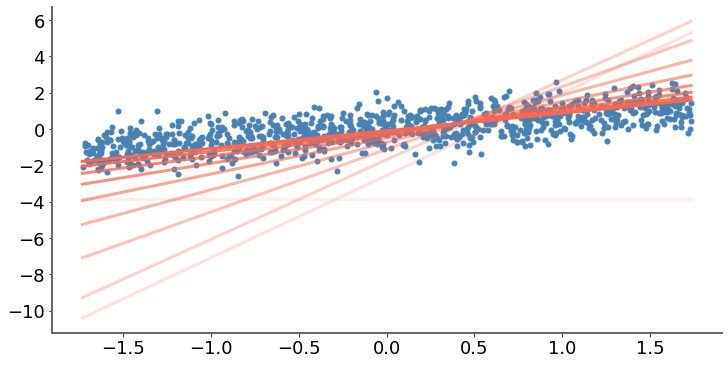

a0= 16.00  a=  0.89
b0=  9.00  b= -0.06


In [4]:
# ---- Paramètres
n_iterations   = 50     # Nombre d'itérations
eta            = 0.04    # taux d’apprentissage

# ---- Initialisation
a,b = 0,y_norm_min

# ---- Visualisation
Xd = np.array([[x_norm_min], [x_norm_max]])

plt.figure(figsize=(width, height))
plt.plot(X_norm[:nb_viz], Y_norm[:nb_viz], '.')
plt.show
nl=0

# ---- Calcul
for i in range(n_iterations):
    
    diff = a*X_norm + b - Y_norm
    da   = (diff * X).sum()*2/n
    db   = diff.sum()*2/n
    
    if (i % (n_iterations/10))==0:
        nl+=1
        Yd = a*Xd + b
        plt.plot(Xd, Yd, color=(1,0.4,0.3,nl/10))
        print("theta:  a={:+12.4f} b={:+12.4f}".format(a,b))

    
    a -= eta*da
    b -= eta*db

plt.show()
print("a0={:6.2f}  a={:6.2f}".format(a0,a))
print("b0={:6.2f}  b={:6.2f}".format(b0,b))

Descente de gradient **ordinaire** (2) :
--------------------------------

 #i    Loss       Gradient          Theta
  0  +15.946   -7.732  -1.464   -3.866  +0.000
 20   +6.038   -4.639  -0.878   -2.320  +0.293
 40   +2.471   -2.784  -0.527   -1.392  +0.468
 60   +1.186   -1.670  -0.316   -0.835  +0.574
 80   +0.724   -1.002  -0.190   -0.501  +0.637
100   +0.558   -0.601  -0.114   -0.301  +0.675
120   +0.498   -0.361  -0.068   -0.180  +0.698
140   +0.476   -0.216  -0.041   -0.108  +0.712
160   +0.469   -0.130  -0.025   -0.065  +0.720
180   +0.466   -0.078  -0.015   -0.039  +0.725
200   +0.465   -0.047  -0.009   -0.023  +0.728


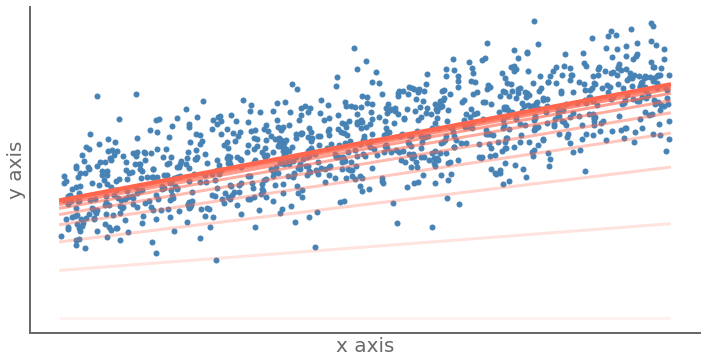

In [5]:
# ---- Paramètres
n_iterations   = 200     # Nombre d'itérations
eta            = 0.2    # taux d’apprentissage

# ---- Initialisation
#a,b = 0,y_norm_min
theta = np.array([[y_norm_min],[0]])
X_b = np.c_[np.ones((n, 1)), X_norm]

# ---- Visualisation
Xd = np.array([[x_norm_min], [x_norm_max]])

plt.figure(figsize=(width, height))
plt.plot(X_norm[:nb_viz], Y_norm[:nb_viz], '.')
nl=0

# ---- Calcul
print( " #i    Loss       Gradient          Theta")
for i in range(n_iterations+1):
 
    gradient = (2/n) * X_b.T @ ( X_b @ theta - Y_norm)
    mse = ((X_b @ theta - Y_norm)**2).mean(axis=None)
    
    if (i % (n_iterations/10))==0:
        nl+=1
        Yd = Xd * theta.item(1) + theta.item(0)
        plt.plot(Xd, Yd, color=(1.,0.4,0.3,nl/11))
        print("{:3d}  {:+7.3f}  {:+7.3f} {:+7.3f}  {:+7.3f} {:+7.3f}".format(i,mse,gradient.item(0),gradient.item(1),theta.item(0),theta.item(1)))


        theta = theta - eta * gradient
        
plt.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
plt.xlabel('x axis')
plt.ylabel('y axis')
ooo.save_fig('LinearReg-c',svg=False)
plt.show()
# print("a0={:6.2f}  a={:6.2f}".format(a0,a))
# print("b0={:6.2f}  b={:6.2f}".format(b0,b))

Descente de gradient **stochastique** :
---------------------------------

theta:  a=     +0.0000 b=     -3.8660
theta:  a=     +0.7516 b=     +0.0334
theta:  a=     +0.7421 b=     -0.0250
theta:  a=     +0.7489 b=     +0.0133
theta:  a=     +0.7107 b=     +0.0069
theta:  a=     +0.7289 b=     -0.0085
theta:  a=     +0.7415 b=     -0.0293
theta:  a=     +0.7628 b=     -0.0352
theta:  a=     +0.7145 b=     -0.0234
theta:  a=     +0.7785 b=     +0.0336
theta:  a=     +0.7703 b=     +0.0157


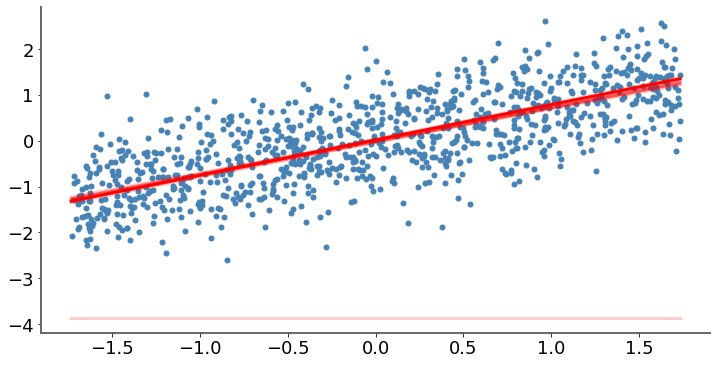

In [6]:
# ---- Paramètres ---------------------------------------------------------------------
#
n_epochs     = 10     # Nombre d'epoques
n_iterations = 5000   # Nombre de tirage au sort

# ---- Visualisation -------------------------------------------------------------------
#
# ---- Visualisation
Xd = np.array([[x_norm_min], [x_norm_max]])

plt.figure(figsize=(width, height))
plt.plot(X_norm[:nb_viz], Y_norm[:nb_viz], '.')
nl=0

def draw_theta(theta,alpha):
    Yd = Xd * theta.item(1) + theta.item(0)
    plt.plot(Xd, Yd, color=(1.,0,0,alpha))
    print("theta:  a={:+12.4f} b={:+12.4f}".format(theta.item(1),theta.item(0)))

# ---- Calcul --------------------------------------------------------------------------

def learning_schedule(t):
    return 5 / (t + 40)

X_b = np.c_[np.ones((n, 1)), X_norm]

#theta = np.random.randn(2,1)
theta = np.array([[y_norm_min],[0]])

for epoch in range(n_epochs):
    
    if epoch % int(n_epochs/9)==0 :
        draw_theta(theta,0.2)

    for i in range(n_iterations):
    
        random_index = np.random.randint(n)
        
        xi = X_b[random_index:random_index+1]
        yi = Y_norm[random_index:random_index+1]

        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

draw_theta(theta,1)
plt.show()